In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [9]:
rawdata = pd.read_csv('data/bitcoin.csv',usecols=[8])

print(rawdata.shape[0])
X = rawdata.head(rawdata.shape[0] - 5)
Y = rawdata.tail(rawdata.shape[0] - 5)

1745


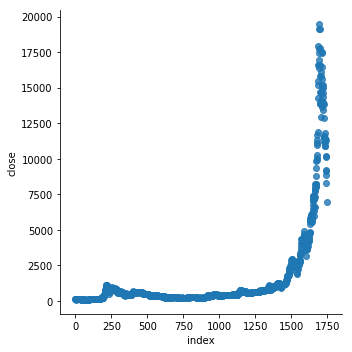

In [19]:
sns.lmplot('index','close', data=rawdata.reset_index(),fit_reg=False)
plt.show()

In [20]:
model = Sequential()
model.add(Dense(1,input_shape=(1,)))
model.add(Activation('linear'))

sgd = SGD(0.02)

model.compile(loss='msle',optimizer=sgd,
             metrics=['msle'])

H = model.fit(X,Y,nb_epoch=3)

/usr/local/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/3
1740/1740 [==============================] - 0s 223us/step - loss: 0.0403 - mean_squared_logarithmic_error: 0.0403
Epoch 2/3
1740/1740 [==============================] - 0s 115us/step - loss: 0.0098 - mean_squared_logarithmic_error: 0.0098
Epoch 3/3
1740/1740 [==============================] - 0s 126us/step - loss: 0.0097 - mean_squared_logarithmic_error: 0.0097


In [21]:
XVal = pd.read_csv('data/trainsetX.csv',usecols=[8]).as_matrix()
model.predict(XVal)


array([[673.921  ],
       [690.75946],
       [771.52893],
       [744.2818 ],
       [736.95105],
       [754.3868 ],
       [765.60565]], dtype=float32)